In [2]:
import BioSimSpace as bss
import nglview as nv
import MDAnalysis as mda
import matplotlib.pyplot as plt

/home/jguven/Software/miniconda3/envs/bss-d/lib/python3.9/site-packages/numpy/core/getlimits.py:499: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/home/jguven/Software/miniconda3/envs/bss-d/lib/python3.9/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  return self._float_to_str(self.smallest_subnormal)
/home/jguven/Software/miniconda3/envs/bss-d/lib/python3.9/site-packages/numpy/core/getlimits.py:499: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/home/jguven/Software/miniconda3/envs/bss-d/lib/python3.9/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  return self._float_to_str(self.smallest_subnormal)



Sending anonymous Sire usage statistics to http://siremol.org.
For more information, see http://siremol.org/analytics
To disable, set the environment variable 'SIRE_DONT_PHONEHOME' to 1
To see the information sent, set the environment variable 
SIRE_VERBOSE_PHONEHOME equal to 1. To silence this message, set
the environment variable SIRE_SILENT_PHONEHOME to 1.



# Zn complex

In [6]:
protein = bss.IO.readPDB("../data/apo_his.pdb")[0]
zn = bss.IO.readPDB("../data/zn.pdb")[0]
water = bss.IO.readPDB("../data/hoh.pdb")[0]

In [7]:
complex = protein + zn + water
bss.IO.saveMolecules("../data/complex.pdb", complex, "pdb")

['/home/jguven/projects/metalloenzymes/apo/data/complex.pdb']

# Adding hydroxide to apo

In [10]:
vim2_apo = bss.IO.readMolecules(files=["../minimisation/apo_solv.gro", "../minimisation/test.top"])
hydoxide = bss.IO.readPDB("../minimisation/hydroxide.pdb")

In [11]:
apo_fixed = vim2_apo + hydoxide
bss.IO.saveMolecules("../minimisation/apo_fixed", apo_fixed, ["Gro87"])

['/home/jguven/projects/metalloenzymes/apo/minimisation/apo_fixed.gro']

In [8]:
bss.IO.fileFormats()

['Gro87', 'GroTop', 'MOL2', 'PDB', 'PRM7', 'PSF', 'RST', 'RST7', 'SDF']

In [4]:
nv.show_file("../minimisation/hydroxide.pdb")

NGLWidget()

In [4]:
nvt = mda.Universe("../nvt/nvt.gro","../nvt/nvt.xtc")
hydroxide = nvt.select_atoms("resid 7635")
hydroxide_atoms = hydroxide.atoms.ids
group1 = hydroxide.select_atoms(f"id {hydroxide_atoms[0]} or id {hydroxide_atoms[1]}")
group2 = hydroxide.select_atoms(f"id {hydroxide_atoms[2]} or id {hydroxide_atoms[3]}")
print(group1.bond.length())
print(group2.bond.length())
zn = nvt.select_atoms("resname ZN1 or resname ZN2")
for atom in hydroxide.atoms:
    print(atom.type)
    # temp_group = nvt.select_atoms(f"name hydroxide")
    # print(temp_group.bond.type) 

0.9667989208380483
0.9605177416323261
H
O
H
O


In [5]:
traj = nvt.trajectory.n_frames
traj

2001

In [6]:
nv.show_mdanalysis(hydroxide+zn)

NGLWidget(max_frame=2000)

In [7]:
length_1 = []
length_2 = []
n_frames = nvt.trajectory.n_frames
for frame in range(n_frames):
    nvt.trajectory[frame]
    hydroxide = nvt.select_atoms("resid 7635")
    hydroxide_atoms = hydroxide.atoms.ids
    group1 = hydroxide.select_atoms(f"id {hydroxide_atoms[0]} or id {hydroxide_atoms[1]}")
    group2 = hydroxide.select_atoms(f"id {hydroxide_atoms[2]} or id {hydroxide_atoms[3]}")
    length_1.append(group1.bond.length())
    length_2.append(group2.bond.length())

In [8]:
times = [nvt.trajectory[frame].time for frame in range(n_frames)]


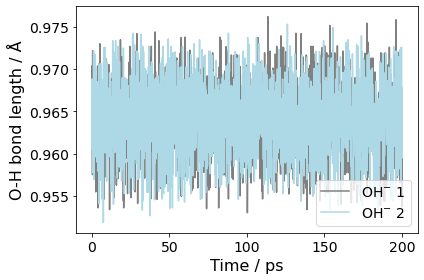

In [17]:
plt.plot(times, length_1, color="grey", label=r"OH$^{-}$ 1")
plt.plot(times, length_2, color="lightblue", label=r"OH$^{-}$ 2")
plt.ylabel("O-H bond length / Å")
plt.xlabel("Time / ps")
plt.tight_layout()
plt.legend(loc="lower right")
plt.savefig("../plots/oh_bond_length.png", dpi=1000, transparent=True)